# Análise Exploratória de Dados sobre Perda de Comida

A perda e o desperdício de alimentos são problemas globais que afetam tanto a segurança alimentar quanto o meio ambiente.
Estima-se que uma parte significativa da produção mundial de comida nunca chegue ao consumo humano, resultando em:

- Impactos econômicos (custos de produção e distribuição desperdiçados);
- Impactos sociais (menos disponibilidade de alimentos para populações vulneráveis);
- Impactos ambientais (emissão de gases de efeito estufa, uso desnecessário de água e solo).

Neste notebook, iremos realizar uma **Análise Exploratória de Dados (EDA)** a partir do arquivo:

**`food_wastage.csv`**

O objetivo é identificar padrões, correlações e insights sobre **como, onde e quanto alimento é perdido ou desperdiçado**, fornecendo subsídios para futuras soluções e estratégias de mitigação.

---

## Importação das bibliotecas necessárias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Lendo a base de dados `food_wastage.csv`

In [29]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('food_wastage.csv')

## Primeiras impressões da base de dados

In [30]:
display(data.head())

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


### Mudando nome das colunas para facilitar o processo de codificação

In [31]:
data = data.rename(columns={
    'Type of Food': "food_type",
    'Number of Guests': "guests_num",
    'Event Type': "event_type",
    'Quantity of Food': "food_quantity_kg",
    'Storage Conditions': "storage_conditions",
    'Purchase History': "purchase_history",
    'Seasonality': "seasonality",
    'Preparation Method': "preparation_method",
    'Geographical Location': "geo_location",
    'Pricing': "pricing",
    'Wastage Food Amount': "wastage_food_amount_kg"
})

## Verificando a mudança de nomes das colunas

In [32]:
display(data.head(1))

,food_type,guests_num,event_type,food_quantity_kg,storage_conditions,purchase_history,seasonality,preparation_method,geo_location,pricing,wastage_food_amount_kg
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25


## Documentação das colunas
`food_type`: Tipo de comida

`guests_num`: Número de convidados no evento

`event_type`: Tipo de evento

`food_quantity_kg`: Quantidade total de comida preparada (em kg)

`storage_conditions`: Condições de armazenamento

`purchase_history`: Histórico de compra

`seasonality`: Sazonalidade

`preparation_method`: Método de preparação

`geo_location`: Localização geográfica do evento

`pricing`: Faixa de preço do evento

`wastage_food_amount_kg`: Quantidade de comida perdida ou desperdiçada (em kg)

In [33]:
data.shape

(1782, 11)

## Verificando se há valores nulos

In [34]:
print(data.isnull().sum())

food_type                 0
guests_num                0
event_type                0
food_quantity_kg          0
storage_conditions        0
purchase_history          0
seasonality               0
preparation_method        0
geo_location              0
pricing                   0
wastage_food_amount_kg    0
dtype: int64


## Conhecendo colunas
### Verificando variações de cada coluna

In [35]:
for col in data.columns:
    print(f"{col} - {data[col].unique()}\n")

food_type - ['Meat' 'Vegetables' 'Fruits' 'Baked Goods' 'Dairy Products']

guests_num - [310 400 302 491 300 240 320 250 267 350 380 220 208 280 438 439 434 290
 450 230 442 397 261 342 275 472 367 292 488 247 207 453 260 412 270 284
 430 429 432]

event_type - ['Corporate' 'Birthday' 'Wedding' 'Social Gathering']

food_quantity_kg - [450 500 371 497 400 350 393 300 282 493 459 495 374 480 482 405 388 489
 420 470 498 348 280 484 452 478 443 477 496 354]

storage_conditions - ['Refrigerated' 'Room Temperature']

purchase_history - ['Regular' 'Occasional']

seasonality - ['All Seasons' 'Winter' 'Summer']

preparation_method - ['Buffet' 'Finger Food' 'Sit-down Dinner']

geo_location - ['Urban' 'Suburban' 'Rural']

pricing - ['Low' 'High' 'Moderate']

wastage_food_amount_kg - [25 40 27 32 20 45 35 10 24 30 15 22 50 39 36 31 23 29 16 63 54 33 38 26
 42 34]



## Categóricas:

### **Nominal**
*(Variáveis que possuem duas ou mais categorias, mas que não têm uma ordem intrínseca.)*

- **food_type**
  - `Meat` (Carne)
  - `Vegetables` (Vegetais)
  - `Fruits` (Frutas)
  - `Baked Goods` (Produtos assados)
  - `Dairy Products` (Laticínios)

- **event_type** 
  - `Corporate` (Corporativo)
  - `Birthday` (Aniversário)
  - `Wedding` (Casamento)
  - `Social Gathering` (Encontro social)

- **storage_conditions**
  - `Refrigerated` (Refrigerado)
  - `Room Temperature` (Temperatura ambiente)

- **purchase_history** 
  - `Regular`
  - `Occasional` (Ocasional)

- **seasonality** 
  - `All Seasons` (Todas as estações)
  - `Winter` (Inverno)
  - `Summer` (Verão)

- **preparation_method** 
  - `Buffet`
  - `Finger Food`
  - `Sit-down Dinner` (Jantar servido)

- **geo_location** 
  - `Urban` (Urbano)
  - `Suburban` (Suburbano)
  - `Rural`

- **pricing** 
  - `Low` (Baixo)
  - `Moderate` (Moderado)
  - `High` (Alto)

---

### **Ordinal**
*(Variáveis que possuem duas ou mais categorias, mas que podem ser ordenadas ou ranqueadas.)*

> *Nenhuma variável explicitamente ordinal neste conjunto. Entretanto, “pricing” (faixa de preço) **pode ser interpretada como ordinal**, dependendo do contexto.*

---

### **Contínuas (Numéricas)**
*(Variáveis que representam valores numéricos contínuos dentro de um intervalo.)*

- **guests_num**  
  

- **food_quantity_kg**  
  
- **wastage_food_amount_kg**
  


## Vamos analisar essas variáveis numéricas!

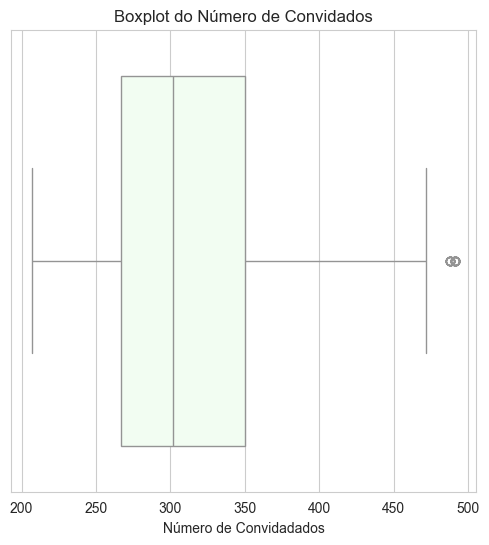

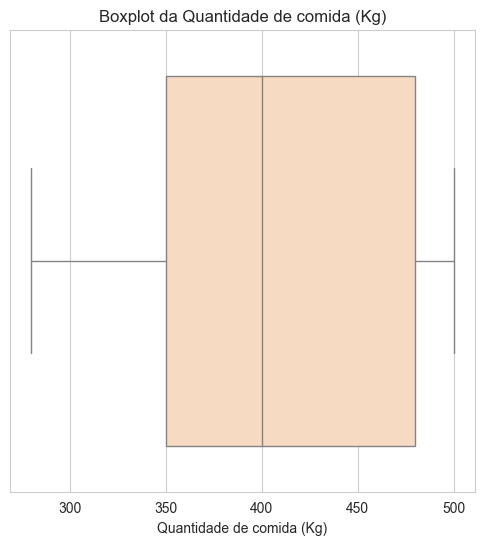

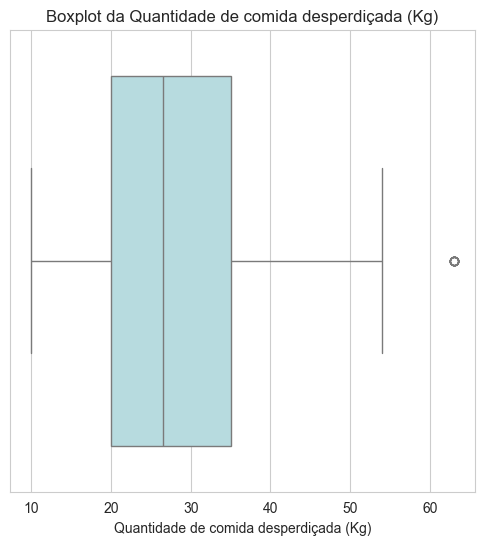

In [36]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['guests_num'], color='honeydew')
plt.title("Boxplot do Número de Convidados")
plt.xlabel('Número de Convidadados')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x=data['food_quantity_kg'], color='peachpuff')
plt.title('Boxplot da Quantidade de comida (Kg)')
plt.xlabel('Quantidade de comida (Kg)')
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(x=data['wastage_food_amount_kg'], color='powderblue')
plt.title('Boxplot da Quantidade de comida desperdiçada (Kg)')
plt.xlabel('Quantidade de comida desperdiçada (Kg)')
plt.show()

## Relação da coluna `wastage_food_amount_kg` com outras features

### `food_type` - Quantidade

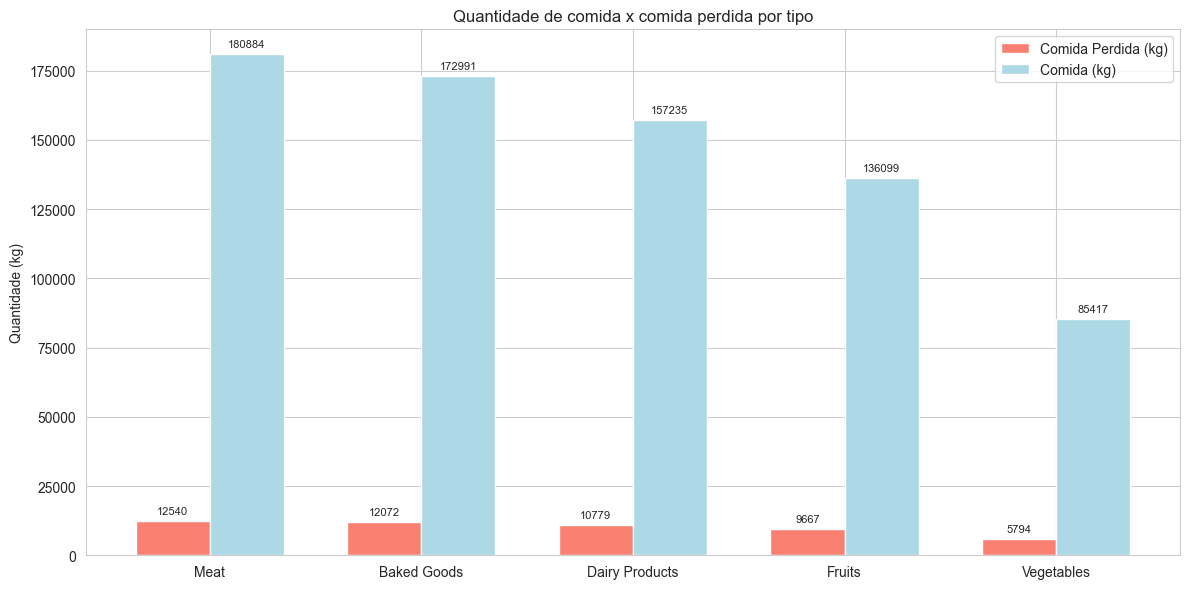

In [37]:
grouped = data.groupby('food_type').agg(
    total_wastage_kg=('wastage_food_amount_kg', 'sum'),
    total_food_kg=('food_quantity_kg', 'sum')
)

grouped = grouped.sort_values(by='total_food_kg', ascending=False)

food_types = grouped.index.to_list()
wasted = grouped['total_wastage_kg'].values
total = grouped['total_food_kg'].values


x = np.arange(len(food_types))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, wasted, width, label='Comida Perdida (kg)', color='salmon')
plt.bar(x + width/2, total, width, label='Comida (kg)', color='lightblue')

# anotação com deslocamento proporcional ao maior valor
offset = max(total.max(), wasted.max()) * 0.01
for i in range(len(x)):
    plt.text(x[i] - width/2, wasted[i] + offset, f'{wasted[i]:.0f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, total[i] + offset, f'{total[i]:.0f}', ha='center', va='bottom', fontsize=8)

plt.xticks(x, food_types, rotation=0)
plt.ylabel('Quantidade (kg)')
plt.title('Quantidade de comida x comida perdida por tipo')
plt.legend()
plt.tight_layout()
plt.show()

### `food_type` - Proporção

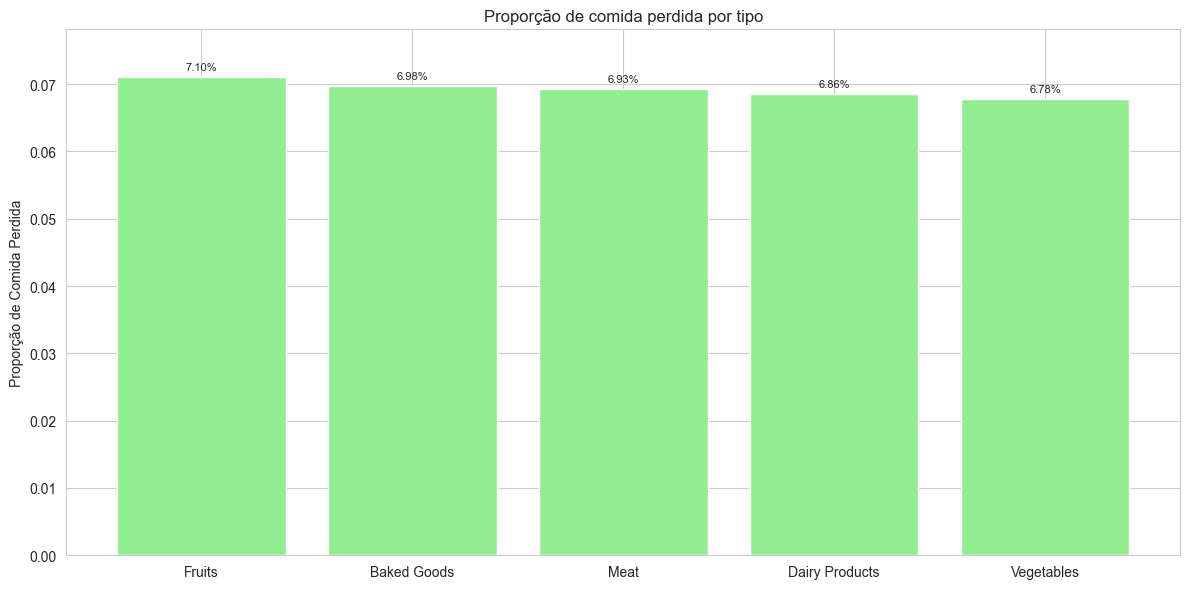

In [38]:
grouped['wastage_proportion'] = grouped['total_wastage_kg'] / grouped['total_food_kg']
grouped = grouped.sort_values(by='wastage_proportion', ascending=False)

food_types = grouped.index.to_list()
proportions = grouped['wastage_proportion'].values

x = np.arange(len(food_types))
plt.figure(figsize=(12,6))
bars = plt.bar(x, proportions, color='lightgreen')
offset = max(proportions) * 0.01
for i in range(len(x)):
    plt.text(x[i], proportions[i] + offset, f'{proportions[i]:.2%}', ha='center', va='bottom', fontsize=8)
plt.xticks(x, food_types, rotation=0)
plt.ylabel('Proporção de Comida Perdida')
plt.title('Proporção de comida perdida por tipo')
plt.ylim(0, max(proportions) * 1.1)
plt.tight_layout()
plt.show()

### `event_type` - Quantidade

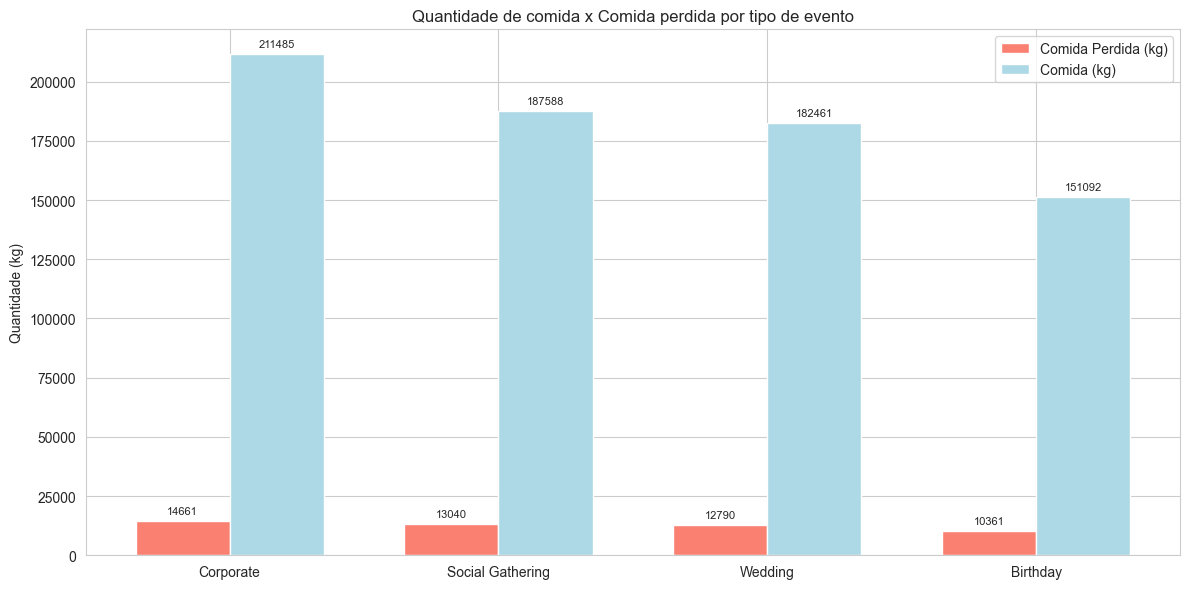

In [39]:
grouped = data.groupby('event_type').agg(
    total_wastage_kg=('wastage_food_amount_kg', 'sum'),
    total_food_kg=('food_quantity_kg', 'sum')
)

grouped = grouped.sort_values(by='total_food_kg', ascending=False)

event_types = grouped.index.to_list()
wasted = grouped['total_wastage_kg'].values
total = grouped['total_food_kg'].values


x = np.arange(len(event_types))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, wasted, width, label='Comida Perdida (kg)', color='salmon')
plt.bar(x + width/2, total, width, label='Comida (kg)', color='lightblue')

# anotação com deslocamento proporcional ao maior valor
offset = max(total.max(), wasted.max()) * 0.01
for i in range(len(x)):
    plt.text(x[i] - width/2, wasted[i] + offset, f'{wasted[i]:.0f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, total[i] + offset, f'{total[i]:.0f}', ha='center', va='bottom', fontsize=8)

    plt.xticks(x, event_types, rotation=0)
plt.ylabel('Quantidade (kg)')
plt.title('Quantidade de comida x Comida perdida por tipo de evento')
plt.legend()
plt.tight_layout()
plt.show()

### `event_type` - Proporção

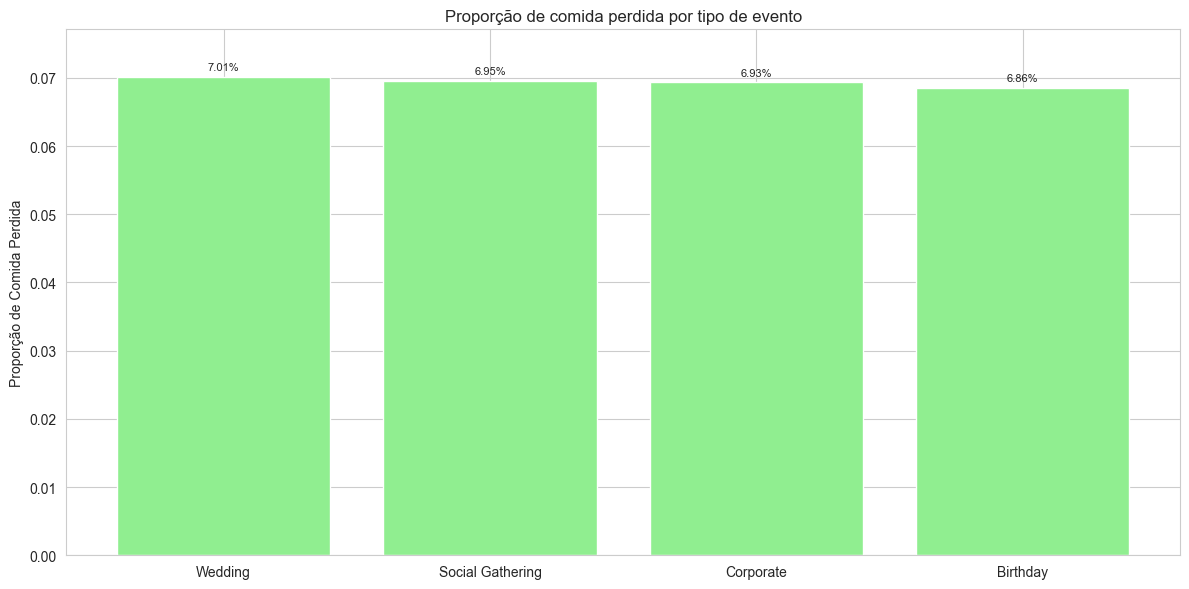

In [40]:
grouped['wastage_proportion'] = grouped['total_wastage_kg'] / grouped['total_food_kg']
grouped = grouped.sort_values(by='wastage_proportion', ascending=False)

event_types = grouped.index.to_list()
proportions = grouped['wastage_proportion'].values

x = np.arange(len(event_types))
plt.figure(figsize=(12, 6))
bars = plt.bar(x, proportions, color='lightgreen')
offset = max(proportions) * 0.01
for i in range(len(x)):
    plt.text(x[i], proportions[i] + offset, f'{proportions[i]:.2%}', ha='center', va='bottom', fontsize=8)
plt.xticks(x, event_types, rotation=0)
plt.ylabel('Proporção de Comida Perdida')
plt.title('Proporção de comida perdida por tipo de evento')
plt.ylim(0, max(proportions) * 1.1)
plt.tight_layout()
plt.show()

### `geo_location` - Quantidade

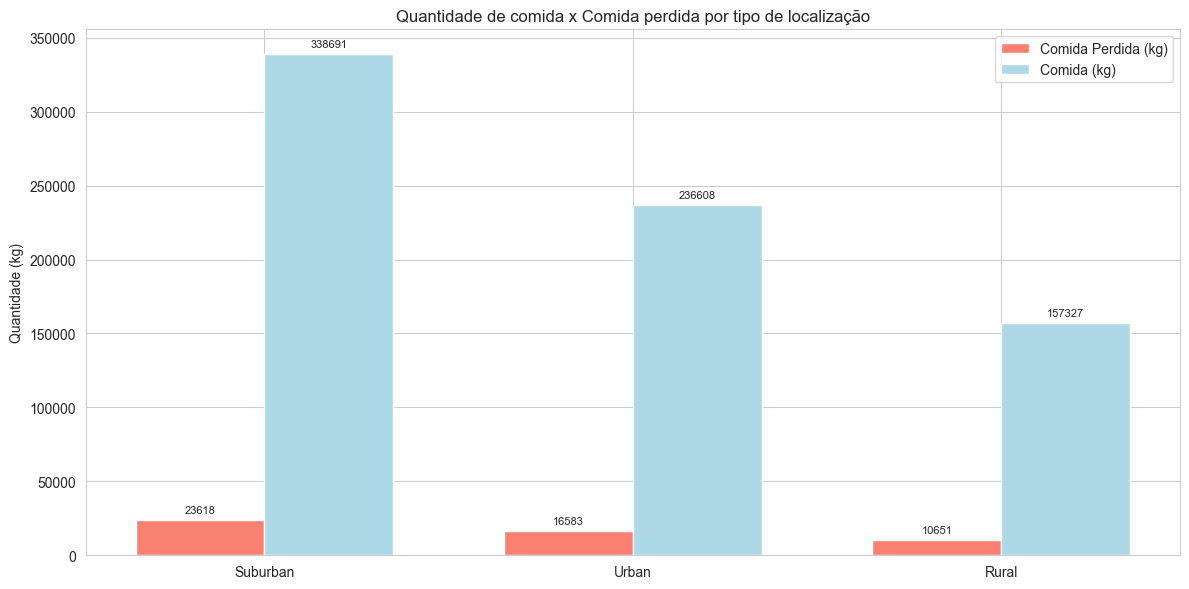

In [41]:
grouped = data.groupby('geo_location').agg(
    total_wastage_kg=('wastage_food_amount_kg', 'sum'),
    total_food_kg=('food_quantity_kg', 'sum')
)

grouped = grouped.sort_values(by='total_food_kg', ascending=False)

location_types = grouped.index.to_list()
wasted = grouped['total_wastage_kg'].values
total = grouped['total_food_kg'].values


x = np.arange(len(location_types))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, wasted, width, label='Comida Perdida (kg)', color='salmon')
plt.bar(x + width/2, total, width, label='Comida (kg)', color='lightblue')

offset = max(total.max(), wasted.max()) * 0.01
for i in range(len(x)):
    plt.text(x[i] - width/2, wasted[i] + offset, f'{wasted[i]:.0f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width/2, total[i] + offset, f'{total[i]:.0f}', ha='center', va='bottom', fontsize=8)

    plt.xticks(x, location_types, rotation=0)
plt.ylabel('Quantidade (kg)')
plt.title('Quantidade de comida x Comida perdida por tipo de localização')
plt.legend()
plt.tight_layout()
plt.show()


### `geo_location` - Proporção

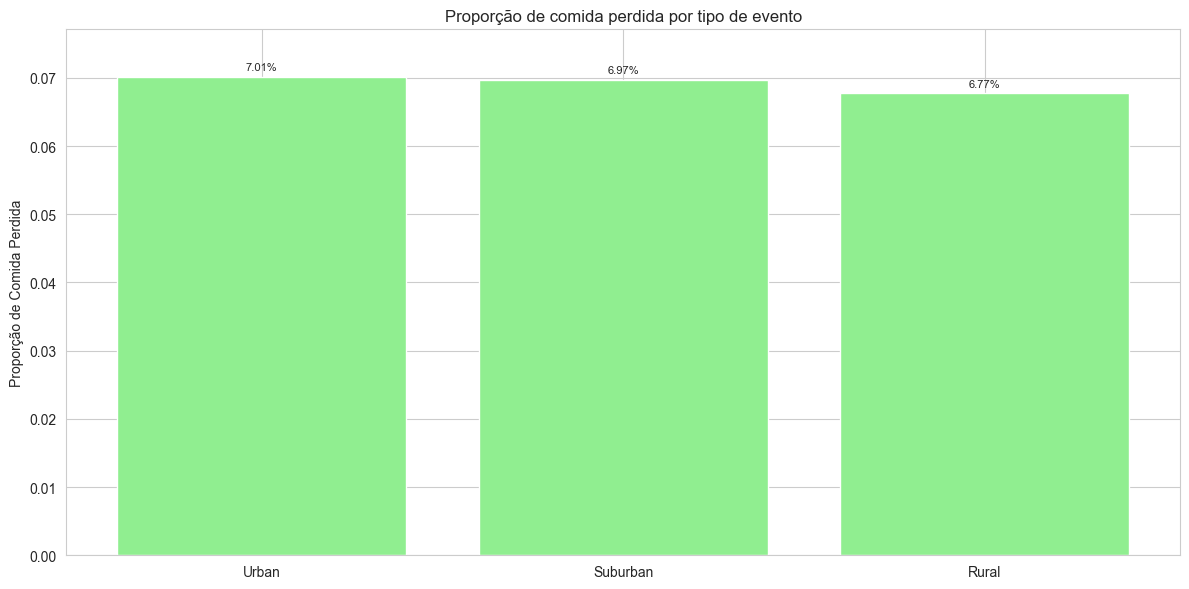

In [42]:
grouped['wastage_proportion'] = grouped['total_wastage_kg'] / grouped['total_food_kg']
grouped = grouped.sort_values(by='wastage_proportion', ascending=False)

location_types = grouped.index.to_list()
proportions = grouped['wastage_proportion'].values

x = np.arange(len(location_types))
plt.figure(figsize=(12, 6))
bars = plt.bar(x, proportions, color='lightgreen')
offset = max(proportions) * 0.01
for i in range(len(x)):
    plt.text(x[i], proportions[i] + offset, f'{proportions[i]:.2%}', ha='center', va='bottom', fontsize=8)
plt.xticks(x, location_types, rotation=0)
plt.ylabel('Proporção de Comida Perdida')
plt.title('Proporção de comida perdida por tipo de evento')
plt.ylim(0, max(proportions) * 1.1)
plt.tight_layout()
plt.show()

## Relações de variáveis por `food_type`

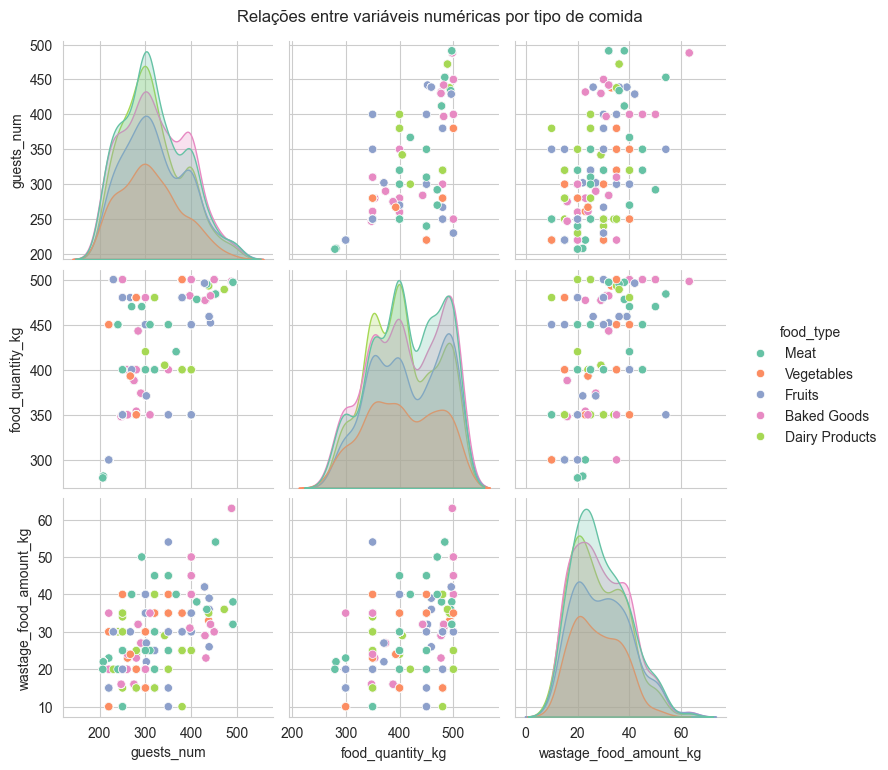

In [43]:
sns.pairplot(
    data,
    vars=["guests_num", "food_quantity_kg", "wastage_food_amount_kg"],
    hue="food_type",
    palette="Set2",
    diag_kind="kde"
)

plt.suptitle("Relações entre variáveis numéricas por tipo de comida", y=1.02)
plt.show()

### Despercício de comida por tipo de evento - `event_type`

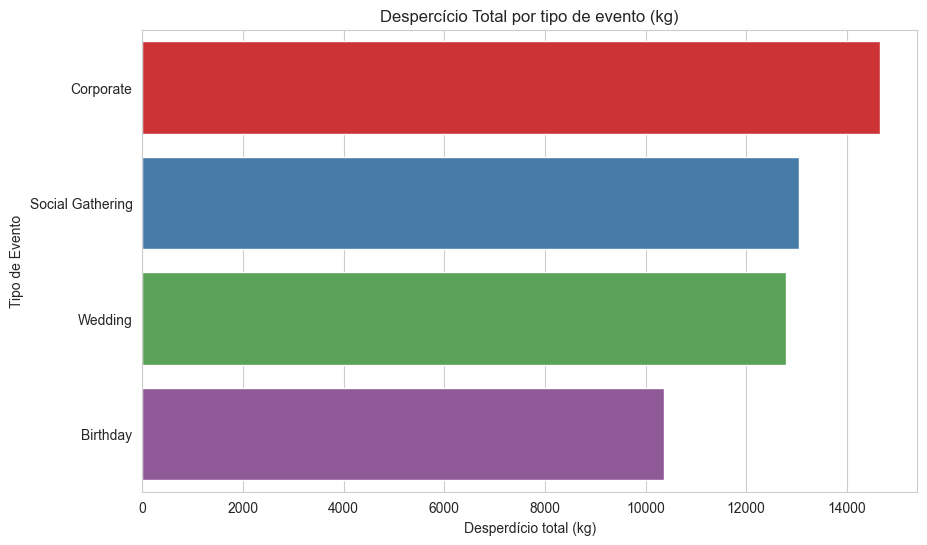

In [47]:
waste_per_event = (
    data.groupby(['event_type'])['wastage_food_amount_kg']
    .sum()
    .reset_index()
    .sort_values(by='wastage_food_amount_kg', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=waste_per_event,
    x='wastage_food_amount_kg',
    y='event_type',
    hue='event_type',
    palette='Set1',
)

plt.title('Despercício Total por tipo de evento (kg)')
plt.xlabel('Desperdício total (kg)')
plt.ylabel('Tipo de Evento')
plt.show()

### Despercício de comida por tipo de evento e tipo de comida - (`event_type` e `food_type`)

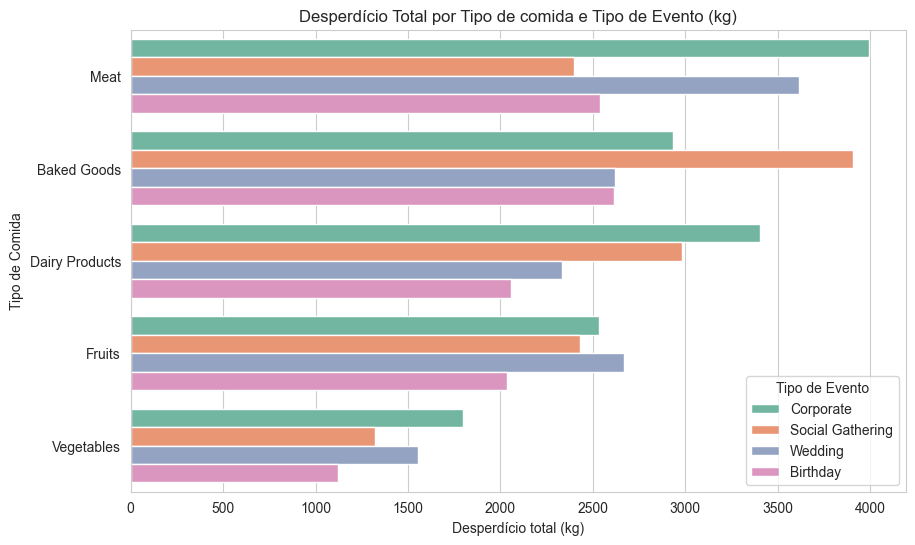

In [45]:
wastage_summary = (
    data.groupby(['food_type', 'event_type'])['wastage_food_amount_kg']
    .sum()
    .reset_index()
    .sort_values(by='wastage_food_amount_kg', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=wastage_summary,
    x='wastage_food_amount_kg',
    y='food_type',
    hue='event_type',
    palette='Set2',
    dodge=True,
)
plt.title('Desperdício Total por Tipo de comida e Tipo de Evento (kg)')
plt.xlabel('Desperdício total (kg)')
plt.ylabel('Tipo de Comida')
plt.legend(title='Tipo de Evento')
plt.show()

### Despercício de comida por tipo de precificação - `pricing`

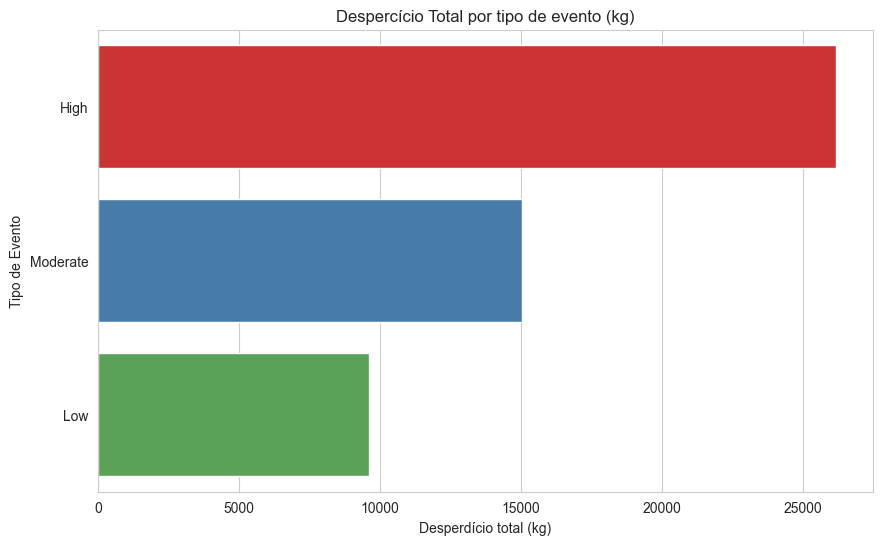

In [48]:
waste_per_event = (
    data.groupby(['pricing'])['wastage_food_amount_kg']
    .sum()
    .reset_index()
    .sort_values(by='wastage_food_amount_kg', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=waste_per_event,
    x='wastage_food_amount_kg',
    y='pricing',
    hue='pricing',
    palette='Set1',
)

plt.title('Despercício Total por tipo de precificação  (kg)')
plt.xlabel('Desperdício total (kg)')
plt.ylabel('Tipo de Evento')
plt.show()